In [1]:
# All orders in DE SHOP from 15/01/18 to 15/05/18 made by customers who bought a NC SP in DE SHOP during this period.

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
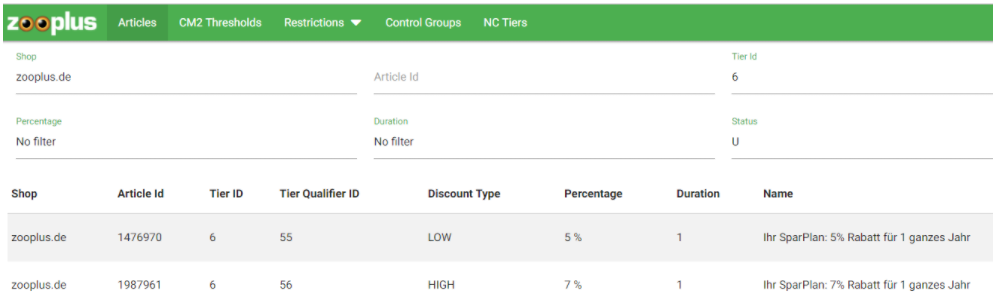

In [2]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('de_nc_sp_tiers.dsv', sep=';', low_memory=False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260739 entries, 0 to 260738
Data columns (total 32 columns):
SCM_N_ORDER_POS_NR              260739 non-null int64
SCM_N_ORDER_NR                  260739 non-null int64
TDT_T_KEY_ORDER_DATE            260739 non-null object
THR_C_KEY_ORDER_HOUR            260739 non-null object
SIT_N_KEY_SITE                  260739 non-null int64
CUS_N_KEY_CUSTOMER              260739 non-null int64
SCM_SALES_BMF                   260739 non-null object
SCM_SALES_CANCEL_BMF            260739 non-null object
SCM_D_FINANCE_CM1               260739 non-null object
SCM_D_FINANCE_CM2               260739 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    260739 non-null object
SCM_AP_ID                       260739 non-null int64
SCM_AS_ID                       260739 non-null int64
SCM_MASTER_AP_ID                260739 non-null int64
SCM_IS_ZSP_ORDER                260739 non-null int64
SCM_C_ORDER_STATUS              260739 non-null object
CTP_N_KEY_CUSTOME

In [6]:
data.head()

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,OSP_KO_COUNT_NET,OSP_3_LEAD_P_PG_ID,OSP_3_LEAD_P_PG_SHARE,OSP_4_LEAD_P_PG_ID,OSP_4_LEAD_P_PG_SHARE,CZP_START_DATE,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE
0,466804669,109560232,27/04/18,16:06,1,8030,"-10,7",0,"-9,7832","-9,7832",...,92,251,"0,4561",2044,"0,4561",18/04/18,18/04/19,56.0,7.0,"7,99"
1,466804667,109560232,27/04/18,16:06,1,8030,"13,99",0,"3,9548","2,0593",...,92,251,"0,4561",2044,"0,4561",18/04/18,18/04/19,56.0,7.0,"7,99"
2,466804671,109560232,27/04/18,16:06,1,8030,"22,99",0,"11,7993","10,9546",...,92,251,"0,4561",2044,"0,4561",18/04/18,18/04/19,56.0,7.0,"7,99"
3,466804672,109560232,27/04/18,16:06,1,8030,"-6,67",0,"-6,0985","-6,0985",...,92,251,"0,4561",2044,"0,4561",18/04/18,18/04/19,56.0,7.0,"7,99"
4,466804670,109560232,27/04/18,16:06,1,8030,"16,66",0,"5,7168","3,4691",...,92,251,"0,4561",2044,"0,4561",18/04/18,18/04/19,56.0,7.0,"7,99"


In [7]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [8]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [9]:
data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%d/%m/%y")
data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [10]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [11]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [12]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [13]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [14]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [15]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [16]:
lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
data['CZP_PRICE'] = lista4

In [17]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [18]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [19]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

In [20]:
len(data), len(data['SCM_N_ORDER_NR'].unique())

(260739, 37457)

In [21]:
#CHECK DUPLICATED ROWS

In [22]:
dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [23]:
len(dupl_mask), sum(dupl_mask)

(37457, 95)

In [24]:
dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [25]:
dup_orders[:10]

array([108982565, 108983233, 108983433, 108983815, 108983990, 108984162,
       108984191, 108985529, 108986515, 108986886], dtype=int64)

In [26]:
len(dup_orders)

95

In [27]:
len(data[data['SCM_N_ORDER_NR'].isin(dup_orders)])

1498

In [28]:
cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

In [29]:
cust_2_dup_orders

array([], dtype=int64)

In [30]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = data[data['SCM_N_ORDER_NR'] == i]
    if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
        sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
        min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [31]:
len(dup_indexes)

95

In [32]:
for c in cust_2_dup_orders:
    #print('Customer', c)
    cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
    if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
        #print('SP Sold')
        sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
        if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
            #print('One order before SP')
            before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
            sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
            max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
            max_dates_b = list(max_date_b.index.values)
            
            after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
            sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
            min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
            min_dates_a = list(min_date_a.index.values)
            
            indexes_date_not_valid = max_dates_b + min_dates_a
            dup_indexes.append(indexes_date_not_valid)
        elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
            #print('One order after SP')
            sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
            min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
            dup_indexes.append(min_date.index.values)
        else:
            print('Something go wrong')
    elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
        #print('No SP Sold')
        sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
        min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [33]:
len(dup_indexes)

95

In [34]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [35]:
len(dupl_ind)

749

In [36]:
exclude_data = data.index.isin(dupl_ind)

In [37]:
data = data[~exclude_data]

In [38]:
len(data)

259990

In [39]:
sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values)

0

In [40]:
#Let`s quantify orders buying NC savings plan per week
sp_sold_weekly = data[data['SCM_MASTER_AP_ID'] == 42225].groupby('WEEK_NUMBER')['SCM_MASTER_AP_ID'].count()

In [41]:
sp_sold_weekly

WEEK_NUMBER
3      920
4      914
5      995
6      877
7      787
8      851
9      937
10     762
11     921
12     789
13     714
14     660
15     680
16    1163
17     776
18     781
19     680
20     222
Name: SCM_MASTER_AP_ID, dtype: int64

**During 18-19 April (Week 16) there was a bug allowing old customers to buy NC SP**

We can check it right now and see differents tiers we have in our dataset. Expected values in a normal situation would be 55, 56 and 'null' (nan) for those orders without SP

In [42]:
data['CZP_ZTQ_ID'].unique()

array([ 56.,  nan,  51.,  53.,  55., 201.,  54.,  52., 203.,  57.])

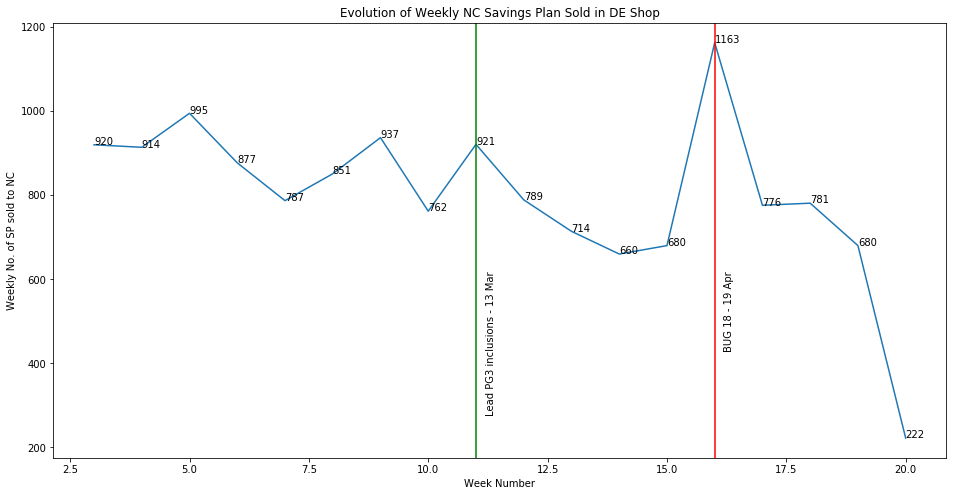

In [43]:
plt.figure(figsize=(16,8))
(sp_sold_weekly).plot()
plt.ylabel('Weekly No. of SP sold to NC')
plt.xlabel('Week Number')
plt.title('Evolution of Weekly NC Savings Plan Sold in DE Shop')

plt.axvline(x=11, color='green')
plt.text(11.2, 600, 'Lead PG3 inclusions - 13 Mar', rotation=90)

plt.axvline(x=16, color='red')
plt.text(16.2, 600, 'BUG 18 - 19 Apr', rotation=90)

ax = plt.gca()
for i, txt in enumerate(sp_sold_weekly):
    ax.annotate(txt, (sp_sold_weekly.index[i],sp_sold_weekly.values[i]))

Last week has not been completed yet...but excluding the 'BUG days' it seems that trend is not increasing.

First of all and with the aim to see what would have been a normal perfomance of new customers (on account basis) let's eliminate all orders involving existing customers

In [44]:
data = data.fillna(0)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259990 entries, 0 to 260738
Data columns (total 38 columns):
SCM_N_ORDER_POS_NR              259990 non-null int64
SCM_N_ORDER_NR                  259990 non-null int64
TDT_T_KEY_ORDER_DATE            259990 non-null datetime64[ns]
THR_C_KEY_ORDER_HOUR            259990 non-null object
SIT_N_KEY_SITE                  259990 non-null int64
CUS_N_KEY_CUSTOMER              259990 non-null int64
SCM_SALES_BMF                   259990 non-null float64
SCM_SALES_CANCEL_BMF            259990 non-null float64
SCM_D_FINANCE_CM1               259990 non-null float64
SCM_D_FINANCE_CM2               259990 non-null float64
SCM_D_ORIG_FINANCE_ORDER_NET    259990 non-null float64
SCM_AP_ID                       259990 non-null int64
SCM_AS_ID                       259990 non-null int64
SCM_MASTER_AP_ID                259990 non-null int64
SCM_IS_ZSP_ORDER                259990 non-null int64
SCM_C_ORDER_STATUS              259990 non-null object
CTP_

In [46]:
data['CZP_ZTQ_ID'].unique()

array([ 56.,   0.,  51.,  53.,  55., 201.,  54.,  52., 203.,  57.])

In [47]:
EC_tiers = [51, 53, 201, 54, 52, 203, 57]

Let's get all customers belonging to those tiers and exclude from our data any order placed by them.

In [48]:
existing_customers_sp = data[data['CZP_ZTQ_ID'].isin(EC_tiers)]['CUS_N_KEY_CUSTOMER'].unique()

In [49]:
existing_customers_sp

array([   67021,    70377,    76849,   128024,   183021,   221193,
         240915,   253642,   302664,   377868,   411285,   428035,
         435979,   498163,   517333,   547939,   549959,   589276,
         643786,   654567,   713499,   716931,   731164,   802351,
         819091,   835981,   840854,   959628,   983792,  1021536,
        1047385,  1057942,  1070054,  1140100,  1245108,  1257155,
        1495917,  1505997,  1655545,  1868400,  1942871,  1969644,
        1995384,  2058951,  2162372,  2170802,  2232535,  2336674,
        2469819,  2489723,  2610993,  2615063,  2720976,  3067274,
        3104697,  3188051,  3203887,  3218177,  3443525,  3466916,
        3507052,  3689863,  3760765,  3894006,  4087819,  4349137,
        4421206,  4679738,  4701916,  4713022,  4729286,  4776603,
        5124527,  5419882,  5430006,  5590104,  5654724,  5688851,
        5896695,  6057009,  6164154,  6248784,  6435587,  6571429,
        6846489,  6863318,  6941788,  7137543,  7449613,  7461

In [50]:
data_nc = data[~(data['CUS_N_KEY_CUSTOMER'].isin(existing_customers_sp))]

After excluding those customers orders I realised that also NC SP customer can renew it (due to the bug) with another a NC SP. Let's check the positions that orders represent in the customer's history. 

In [51]:
data_nc['OSP_KO_COUNT_NET'].value_counts()

1       80440
2       75352
3       34285
4       18082
5        9111
6        5131
7        2612
8        1594
9        1033
10        722
11        686
12        448
14        288
13        282
15        200
16        194
18        179
19        165
17        156
30        155
21        130
33        113
23        111
24        106
25        105
42         97
20         97
32         95
41         95
34         94
        ...  
1191        3
1520        3
1319        3
1260        3
1388        3
1516        3
1555        3
1485        3
1378        3
1250        3
1547        3
1220        3
1358        3
1505        3
1390        3
1172        3
1263        3
1391        3
1428        3
1475        3
1347        3
1231        3
1440        3
1290        3
1312        3
1474        3
1346        3
1264        3
1446        3
1359        2
Name: OSP_KO_COUNT_NET, Length: 2086, dtype: int64

If we want to provide an analysis on how differents SP types are performing in true acquisition & repurchasing (at least on account basis) we need to be strict and get only orders from customers who bought their SP during the 1st or 2nd order. Go on!

- Get customers who bought NC SP in 1st/2nd order from 13 Mar on...
- Collect all orders placed by them

In [52]:
data = pd.read_csv('orders_from_nc_accounts_sp.dsv', sep=';', low_memory=False)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130599 entries, 0 to 130598
Data columns (total 32 columns):
SCM_N_ORDER_POS_NR              130599 non-null int64
SCM_N_ORDER_NR                  130599 non-null int64
TDT_T_KEY_ORDER_DATE            130599 non-null object
THR_C_KEY_ORDER_HOUR            130599 non-null object
SIT_N_KEY_SITE                  130599 non-null int64
CUS_N_KEY_CUSTOMER              130599 non-null int64
SCM_SALES_BMF                   130412 non-null object
SCM_SALES_CANCEL_BMF            130412 non-null object
SCM_D_FINANCE_CM1               130599 non-null object
SCM_D_FINANCE_CM2               130599 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    130599 non-null object
SCM_AP_ID                       130493 non-null float64
SCM_AS_ID                       130599 non-null int64
SCM_MASTER_AP_ID                130599 non-null int64
SCM_IS_ZSP_ORDER                130270 non-null float64
SCM_C_ORDER_STATUS              130599 non-null object
CTP_N_KEY_CUS

In [54]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [55]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [56]:
data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%d/%m/%y")
data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [57]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [58]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [59]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [60]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [61]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [62]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [63]:
lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
data['CZP_PRICE'] = lista4

In [64]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [65]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [66]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

In [67]:
len(data), len(data['SCM_N_ORDER_NR'].unique())

(130599, 20215)

In [68]:
#CHECK DUPLICATED ROWS

In [69]:
dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [70]:
len(dupl_mask), sum(dupl_mask)

(20215, 1)

In [71]:
dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [72]:
dup_orders[:10]

array([109329220], dtype=int64)

In [73]:
len(dup_orders)

1

In [74]:
len(data[data['SCM_N_ORDER_NR'].isin(dup_orders)])

6

In [75]:
cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

In [76]:
cust_2_dup_orders

array([], dtype=int64)

In [77]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = data[data['SCM_N_ORDER_NR'] == i]
    if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
        sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
        min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [78]:
len(dup_indexes)

1

In [79]:
for c in cust_2_dup_orders:
    #print('Customer', c)
    cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
    if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
        #print('SP Sold')
        sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
        if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
            #print('One order before SP')
            before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
            sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
            max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
            max_dates_b = list(max_date_b.index.values)
            
            after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
            sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
            min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
            min_dates_a = list(min_date_a.index.values)
            
            indexes_date_not_valid = max_dates_b + min_dates_a
            dup_indexes.append(indexes_date_not_valid)
        elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
            #print('One order after SP')
            sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
            min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
            dup_indexes.append(min_date.index.values)
        else:
            print('Something go wrong')
    elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
        #print('No SP Sold')
        sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
        min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [80]:
len(dup_indexes)

1

In [81]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [82]:
len(dupl_ind)

3

In [83]:
exclude_data = data.index.isin(dupl_ind)

In [84]:
data = data[~exclude_data]

In [85]:
len(data)

130596

In [86]:
sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values)

0

Let's get PG3 & PG4 short_link names from our DB to make data more readable...

In [87]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [88]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')') 

In [89]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [90]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [91]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK'])}

In [92]:
pg3_dict[0] = 'null'

In [93]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [94]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(130596, 130596)

In [95]:
data['LEAD_PG3_NAME'] = lista_pg3

In [96]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [97]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')') 

In [98]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [99]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [100]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [101]:
pg4_dict[-1] = 'null'

In [102]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(0)]

In [103]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(130596, 130596)

In [104]:
data['LEAD_PG4_NAME'] = lista_pg4

In [105]:
data[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME']].sample(5)

,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME
52999,2068,katzenfutter_dose,148538,purina_one
129888,2068,katzenfutter_dose,154882,mac_s
62887,1540,katzenbetten_katzenkissen,1555,haeuser_hoehlen
93688,2068,katzenfutter_dose,3155,schesir
35856,857,hundefutter_nassfutter,870,rinti


Now we want to flag customers and orders depending on the suitable Lead PG3 that let them buy their SP. We will define two groups:
- Food
- Accesories/Others
 
Also required going through eligibility criteria with Lead PG3 new set up:


In [106]:
# Checking matching patterns: 'futter', 'snack' or 'barf'
food_lead_pg = data[(data['LEAD_PG3_NAME'].str.contains('futter')) | (data['LEAD_PG3_NAME'].str.contains('snack')) |
    (data['LEAD_PG3_NAME'].str.contains('barf'))]['LEAD_PG3_NAME'].unique()

In [107]:
food_lead_pg

array(['katzenfutter_dose', 'hundefutter_nassfutter',
       'katzenfutter_trockenfutter', 'hundefutter_trockenfutter',
       'hundefutter_ergaenzung', 'hundesnacks', 'katzensnacks',
       'fischfutter', 'futter', 'barf', 'pferdefutter', 'vogelfutter',
       'katzenfutter_ergaenzung', 'pferdefutter_ergaenzungsfutter',
       'futter_ergaenzung'], dtype=object)

In [108]:
data[~((data['LEAD_PG3_NAME'].str.contains('futter')) | (data['LEAD_PG3_NAME'].str.contains('snack')) |
    (data['LEAD_PG3_NAME'].str.contains('barf')))]['LEAD_PG3_NAME'].unique()

array(['katzentoilette', 'katzenspielzeug', 'katzenstreu',
       'katzenbetten_katzenkissen', 'hundebett', 'kratzbaum_katzenbaum',
       'balkon_garten', 'hundetransportbox', 'ungezieferschutz',
       'hundeleine_hundehalsband', 'superbox_dog', 'sport_training',
       'fressnapf', 'hundespielzeug', 'reitzubehoer', 'hundepflege',
       'hundehuette_hundetuer', 'wirbellose_tiere', 'pflege', 'transport',
       'kaefigzubehoer', 'freigehege', 'kaninchenstaelle',
       'aquarium_pumpen', 'aquarium_pflanzen', 'sparplan', 'heu_streu',
       'kaefig', 'kaefige_freigehege', 'hundebekleidung_hundemantel',
       'beleuchtung', 'aquarium_zubehoer', 'wasserpflege_aquarium',
       'aquarium_dekoration', 'spielzeug', 'pferdezubehoer', 'aquarium',
       'terrarium_technik', 'neue_produkte_pferde',
       'royal_canin_zugabeartikel', 'pferdeleckerli',
       'geschenkgutscheine', 'einstreu'], dtype=object)

In [109]:
pg3_hclv_new = [7, 9, 15, 16, 18, 20, 23, 29, 33, 34, 36, 37, 38, 251, 252, 409, 
            857, 1400, 1540, 2068, 2155, 2190, 2192, 40023, 96309, 153317, 
            183134, 196231, 207553, 207624, 291337]

In [110]:
pg4_excluded = [170799, 1308, 311, 106999, 282, 167128, 241830, 42545, 4891, 314, 286, 285, 867, 860,
                   244734, 2069, 2072, 2125, 2078, 9616, 242705]

Taking into account that all accounts in our data have bought a SP and did it in their 1st or 2nd order:
    - Those who did it in first order should include a Lead PG3 from pg3_hclv_new
    - The ones buying in 2nd order might have the suitable Lead PG3 in 2nd or in the 1st one.

We still continue having some SP bought after 1st or 2nd orders but in those cases, customers bought a first SP in 1st or 2nd, then cancelled them or simply had no activity (SP expired) and bought another in their next order...Anyway, let's exclude them.

In [111]:
data[data['SCM_MASTER_AP_ID'] == 42225]['OSP_KO_COUNT_NET'].unique()

array([1, 2, 3, 6, 4], dtype=int64)

In [112]:
mask = [len(i) > 1 for i in data[data['SCM_MASTER_AP_ID'] == 42225].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].unique().values]
data[data['SCM_MASTER_AP_ID'] == 42225].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].unique()[mask]

CUS_N_KEY_CUSTOMER
7574779                 [29672776, 108356361]
8320981                 [33920851, 106858570]
9228737                 [39090484, 106999232]
10015625                [43628288, 108345487]
11926169                [54879891, 108822058]
12367904                [57663893, 109884058]
12795579                [60307940, 109405342]
12840590                [60581920, 109500678]
13230687                [109678002, 62941484]
13714610                [109460783, 65740649]
13887221                [107687371, 66800454]
14369222                [108574993, 69691270]
14602020                [71196428, 108975367]
14761630                [72239345, 109735033]
14860089                [106866393, 72898579]
15001941                [108370584, 73879289]
15010075                [109075975, 73930964]
15073349                [109187057, 74370651]
15308064                [76055033, 108024174]
15315278                [107135675, 76107649]
15335005                [106669601, 78039873]
15400753       

In [113]:
cust_to_exclude = data[data['SCM_MASTER_AP_ID'] == 42225].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].unique()[mask].index.values

In [114]:
cust_to_exclude

array([ 7574779,  8320981,  9228737, 10015625, 11926169, 12367904,
       12795579, 12840590, 13230687, 13714610, 13887221, 14369222,
       14602020, 14761630, 14860089, 15001941, 15010075, 15073349,
       15308064, 15315278, 15335005, 15400753, 15410309, 15676470,
       15933172, 15971415, 16187449, 16425040, 16516372, 16652210,
       16983063, 19702734, 19820983, 20037572, 20040653, 20043047,
       20055617], dtype=int64)

In [115]:
data = data[~data['CUS_N_KEY_CUSTOMER'].isin(cust_to_exclude)]

We have now 6563 different customer accounts and 6563 SP sold

In [116]:
data['CUS_N_KEY_CUSTOMER'].nunique()

6563

In [117]:
data[data['SCM_MASTER_AP_ID'] == 42225]['SCM_N_ORDER_NR'].nunique()

6563

3866 of SP total amount bought in 1st order and 2697 during the 2nd...

In [118]:
data[data['SCM_MASTER_AP_ID'] == 42225].groupby('OSP_KO_COUNT_NET')['SCM_N_ORDER_NR'].nunique()

OSP_KO_COUNT_NET
1    3866
2    2697
Name: SCM_N_ORDER_NR, dtype: int64

In [119]:
data[data['SCM_MASTER_AP_ID'] == 42225].groupby('OSP_KO_COUNT_NET')['CUS_N_KEY_CUSTOMER'].nunique()

OSP_KO_COUNT_NET
1    3866
2    2697
Name: CUS_N_KEY_CUSTOMER, dtype: int64

In [120]:
cus_sp_1st = data[(data['SCM_MASTER_AP_ID'] == 42225) & (data['OSP_KO_COUNT_NET'] == 1)]['CUS_N_KEY_CUSTOMER'].unique()

In [121]:
len(cus_sp_1st)

3866

In [122]:
cus_sp_2nd = data[(data['SCM_MASTER_AP_ID'] == 42225) & (data['OSP_KO_COUNT_NET'] == 2)]['CUS_N_KEY_CUSTOMER'].unique()

In [123]:
len(cus_sp_2nd)

2697

In [124]:
elig_1st = data[(data['OSP_KO_COUNT_NET'] == 1) & (data['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                       (~data['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded))]['CUS_N_KEY_CUSTOMER'].unique()                                                           

Total amount of SP eligible orders in 1st order:

In [125]:
len(elig_1st)

6123

In [126]:
elig_2nd = [i for i in data['CUS_N_KEY_CUSTOMER'].unique() if i not in elig_1st]

Total amount of SP eligible orders in 2nd order:

In [127]:
len(elig_2nd)

440

In [128]:
cus_pg_dict = {}

for i in data['CUS_N_KEY_CUSTOMER'].unique():
    n_orders = [1, 2]
    cus_data = data[(data['CUS_N_KEY_CUSTOMER'] == i) & (data['OSP_KO_COUNT_NET'].isin(n_orders))]
    if i in cus_sp_1st:
        cus_pg_dict[i] = cus_data[cus_data['OSP_KO_COUNT_NET'] == 1]['LEAD_PG3_NAME'].unique()
    elif i in elig_1st:
        cus_pg_dict[i] = cus_data[cus_data['OSP_KO_COUNT_NET'] == 1]['LEAD_PG3_NAME'].unique()
    elif i in cus_sp_2nd:
        cus_pg_dict[i] = cus_data[cus_data['OSP_KO_COUNT_NET'] == 2]['LEAD_PG3_NAME'].unique()
    else:
        print('Something happens...')

In [129]:
cus_pg_dict

{19830991: array(['katzentoilette'], dtype=object),
 19784870: array(['katzenspielzeug'], dtype=object),
 19904097: array(['katzenbetten_katzenkissen'], dtype=object),
 19734573: array(['hundefutter_nassfutter'], dtype=object),
 19819469: array(['katzenfutter_trockenfutter'], dtype=object),
 18026692: array(['hundefutter_trockenfutter'], dtype=object),
 19912110: array(['hundebett'], dtype=object),
 19683911: array(['hundefutter_trockenfutter'], dtype=object),
 20077339: array(['kratzbaum_katzenbaum'], dtype=object),
 20096922: array(['katzenbetten_katzenkissen'], dtype=object),
 20198234: array(['hundetransportbox'], dtype=object),
 20069829: array(['katzentoilette'], dtype=object),
 19744079: array(['hundefutter_trockenfutter'], dtype=object),
 19368146: array(['katzenfutter_dose'], dtype=object),
 20150319: array(['hundefutter_nassfutter'], dtype=object),
 20126136: array(['katzenfutter_trockenfutter'], dtype=object),
 19947664: array(['ungezieferschutz'], dtype=object),
 19588534: 

In [130]:
len(list(cus_pg_dict.keys()))

6563

In [131]:
list_pg3_values = [i[0] for i in list(cus_pg_dict.values())]  

In [132]:
len(list_pg3_values)

6563

In [133]:
set(list_pg3_values)

{'aquarium_zubehoer',
 'balkon_garten',
 'barf',
 'fressnapf',
 'hundebekleidung_hundemantel',
 'hundebett',
 'hundefutter_ergaenzung',
 'hundefutter_nassfutter',
 'hundefutter_trockenfutter',
 'hundehuette_hundetuer',
 'hundeleine_hundehalsband',
 'hundepflege',
 'hundesnacks',
 'hundespielzeug',
 'hundetransportbox',
 'kaefig',
 'kaefige_freigehege',
 'katzenbetten_katzenkissen',
 'katzenfutter_dose',
 'katzenfutter_ergaenzung',
 'katzenfutter_trockenfutter',
 'katzensnacks',
 'katzenspielzeug',
 'katzenstreu',
 'katzentoilette',
 'kratzbaum_katzenbaum',
 'sparplan',
 'spielzeug',
 'sport_training',
 'transport',
 'ungezieferschutz',
 'vogelfutter'}

In [134]:
food_lead_pg

array(['katzenfutter_dose', 'hundefutter_nassfutter',
       'katzenfutter_trockenfutter', 'hundefutter_trockenfutter',
       'hundefutter_ergaenzung', 'hundesnacks', 'katzensnacks',
       'fischfutter', 'futter', 'barf', 'pferdefutter', 'vogelfutter',
       'katzenfutter_ergaenzung', 'pferdefutter_ergaenzungsfutter',
       'futter_ergaenzung'], dtype=object)

In [135]:
is_food_sp_cust = [1 if cus_pg_dict[i][0] in food_lead_pg else 0 for i in data['CUS_N_KEY_CUSTOMER']]

In [136]:
len(data) == len(is_food_sp_cust)

True

In [137]:
data['IS_FOOD_SP_CUS'] = is_food_sp_cust

In [138]:
lead_pg3_sp_customer = [cus_pg_dict[i][0] for i in data['CUS_N_KEY_CUSTOMER']]

In [139]:
len(data) == len(lead_pg3_sp_customer)

True

In [140]:
data['LEAD_PG3_SP'] = lead_pg3_sp_customer

In [141]:
data[data.columns[-2:]]

,IS_FOOD_SP_CUS,LEAD_PG3_SP
0,0,katzentoilette
1,0,katzentoilette
2,0,katzentoilette
3,0,katzentoilette
4,0,katzentoilette
5,0,katzentoilette
6,0,katzentoilette
7,0,katzentoilette
8,0,katzentoilette
9,0,katzentoilette


In [142]:
ord_cus_date = data.groupby(['SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE','CUS_N_KEY_CUSTOMER', 'LEAD_PG3_NAME', 'LEAD_PG3_SP'], 
                            as_index=False).agg({'SCM_D_ORIG_FINANCE_ORDER_NET': 'sum',
                                                'SCM_D_FINANCE_CM1': 'sum',
                                                'SCM_D_FINANCE_CM2': 'sum',
                                                'IS_FOOD_SP_CUS': 'mean',
                                                'OSP_KO_COUNT_NET': 'mean'})

In [143]:
#ord_cus_date[ord_cus_date['CUS_N_KEY_CUSTOMER'] == 1532419]

In [144]:
food_lead_pg

array(['katzenfutter_dose', 'hundefutter_nassfutter',
       'katzenfutter_trockenfutter', 'hundefutter_trockenfutter',
       'hundefutter_ergaenzung', 'hundesnacks', 'katzensnacks',
       'fischfutter', 'futter', 'barf', 'pferdefutter', 'vogelfutter',
       'katzenfutter_ergaenzung', 'pferdefutter_ergaenzungsfutter',
       'futter_ergaenzung'], dtype=object)

In [145]:
pg3[~pg3['PG_SHORTLINK'].isin(food_lead_pg)]

,PG_ID,PG_SHORTLINK
0,9,hundebett
1,15,hundeleine_hundehalsband
2,16,fressnapf
4,20,hundespielzeug
5,23,kratzbaum_katzenbaum
6,29,katzentoilette
7,33,fressnapf
9,36,katzenspielzeug
10,37,transport
12,42,kaefigzubehoer


In [146]:
pg3[~pg3['PG_SHORTLINK'].isin(food_lead_pg)]['PG_ID'].ravel()

array([     9,     15,     16,     20,     23,     29,     33,     36,
           37,     42,     47,     48,     51,     65,     67,     68,
          301,    305,    409,    470,    484,    486,    741,    758,
         1540,   1635,   2155,   2190,   2192,   2471,   3138,   3657,
         9857,   9885,  13569,  17947,  40023,  48963,  49821,  49828,
       122398, 126729, 153317, 207553, 207624, 255413], dtype=int64)

In [194]:
pg3[pg3['PG_SHORTLINK'].isin(food_lead_pg)]['PG_ID'].ravel()

array([    18,     34,     38,     45,     62,    221,    251,    252,
          401,    857,   1106,   1400,   2068,   9788, 183134],
      dtype=int64)

In [147]:
ord_cus_date

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,LEAD_PG3_NAME,LEAD_PG3_SP,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,IS_FOOD_SP_CUS,OSP_KO_COUNT_NET
0,4495035,2008-01-19,1295500,beleuchtung,hundefutter_trockenfutter,30.3194,0.0000,0.0000,1,1
1,4496890,2008-01-20,1296754,hundebett,hundebett,37.4533,0.0000,0.0000,0,1
2,4544004,2008-01-29,1332477,hundetransportbox,hundetransportbox,34.3617,0.0000,0.0000,0,1
3,4575436,2008-02-05,1354994,katzensnacks,katzensnacks,55.6335,0.0000,0.0000,1,1
4,4587152,2008-02-07,1361714,hundeleine_hundehalsband,hundeleine_hundehalsband,39.1555,0.0000,0.0000,0,1
5,4798075,2008-03-24,1461660,hundetransportbox,hundetransportbox,84.7629,0.0000,0.0000,0,1
6,4854622,2008-04-04,1483320,hundefutter_ergaenzung,hundefutter_ergaenzung,85.6925,0.0000,0.0000,1,1
7,5003813,2008-05-09,1523209,fressnapf,fressnapf,67.2101,29.5301,25.4101,0,1
8,5036602,2008-05-17,1532419,hundetransportbox,hundetransportbox,238.6975,64.3375,60.2475,0,1
9,5322596,2008-07-13,1629931,hundeleine_hundehalsband,hundeleine_hundehalsband,23.3109,9.1509,5.3209,0,1


In [148]:
ord_cus_date.groupby('IS_FOOD_SP_CUS').agg({'CUS_N_KEY_CUSTOMER': 'nunique',
                                   'SCM_N_ORDER_NR': 'nunique',
                                   'SCM_D_ORIG_FINANCE_ORDER_NET': ['sum', 'mean'],
                                   'SCM_D_FINANCE_CM1': ['sum', 'mean'],
                                   'SCM_D_FINANCE_CM2': ['sum', 'mean']}).round(2)

CUS_N_KEY_CUSTOMER SCM_N_ORDER_NR SCM_D_ORIG_FINANCE_ORDER_NET  \
                          nunique        nunique                          sum   
IS_FOOD_SP_CUS                                                                  
0                            2237           5528                    369054.14   
1                            4326           9518                    675874.06   

                      SCM_D_FINANCE_CM1        SCM_D_FINANCE_CM2         
                 mean               sum   mean               sum   mean  
IS_FOOD_SP_CUS                                                           
0               66.76         121123.28  21.91          77433.77  14.01  
1               71.01         172211.22  18.09          96938.84  10.18

After those results we would tend to think about accessories/others NC SP performing well because they have an important number of orders & customers and better cm1 and cm2 average per order...
 
We need to go one level down food and non-food SP customers to check also repurchasing.

In [149]:
metrics_per_cus = pd.DataFrame(columns=['CUSTOMER_ID', 'IS_FOOD_SP_CUS', 'LEAD_PG3_SP', 'ORDERS', 'REP_28D_FROM_SP_ORDER',
                                        'SP_ORDER_DATE',
                                        'NET_SALES', 'NET_SALES_WO_1ST', 'CM1', 'CM1_WO_1ST', 'CM2', 'CM2_WO_1ST',
                                        'FOOD_ORDERS', 'F_NET_SALES', 'F_CM1', 'F_CM2',
                                        'OTHER_ORDERS','O_NET_SALES', 'O_CM1', 'O_CM2'])

In [150]:
for n, i in enumerate(data['CUS_N_KEY_CUSTOMER'].unique()):
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == i]
    customer_id = cus_data['CUS_N_KEY_CUSTOMER'].unique()[0]
    is_food_sp = cus_data['IS_FOOD_SP_CUS'].unique()[0]
    lead_pg3_sp = cus_data['LEAD_PG3_SP'].unique()[0]
    orders = cus_data['SCM_N_ORDER_NR'].nunique()
    first_order = cus_data[cus_data['OSP_KO_COUNT_NET'] == cus_data['OSP_KO_COUNT_NET'].min()]
    #repurchasing after SP order
    sp_order = cus_data[cus_data['SCM_IS_ZSP_ORDER'] == 1]
    sp_order_datetime = sp_order['ORDER_DATETIME'].unique()[0]
    sp_order_date = sp_order['ORDER_DATETIME'].dt.date.unique()[0]
    rep_date_28 = sp_order_date + timedelta(days = 28)
    rep_28_days = cus_data[(cus_data['ORDER_DATETIME'] > sp_order_datetime) & (cus_data['TDT_T_KEY_ORDER_DATE'] <= rep_date_28)]
    rep_28_days_cus = (len(rep_28_days['SCM_N_ORDER_NR'].unique()) >= 1 ) * 1
    #date_limit = data['TDT_T_KEY_ORDER_DATE'].dt.date.max() - timedelta(days=29)
    #cus_incl_in_rep = (sp_order_date <= date_limit) * 1
    #end of repurchasing calculation
    net_sales = cus_data['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    net_sales_without_1st = cus_data['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() - first_order['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    cm1 = cus_data['SCM_D_FINANCE_CM1'].sum()
    cm1_without_1st = cus_data['SCM_D_FINANCE_CM1'].sum() - first_order['SCM_D_FINANCE_CM1'].sum()
    cm2 = cus_data['SCM_D_FINANCE_CM2'].sum()
    cm2_without_1st = cus_data['SCM_D_FINANCE_CM2'].sum() - first_order['SCM_D_FINANCE_CM2'].sum()
    food_orders = cus_data[cus_data['LEAD_PG3_NAME'].isin(food_lead_pg)]['SCM_N_ORDER_NR'].unique()
    food_orders_amount = len(food_orders)
    f_net_sales = cus_data[cus_data['SCM_N_ORDER_NR'].isin(food_orders)]['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    f_cm1 = cus_data[cus_data['SCM_N_ORDER_NR'].isin(food_orders)]['SCM_D_FINANCE_CM1'].sum()
    f_cm2 = cus_data[cus_data['SCM_N_ORDER_NR'].isin(food_orders)]['SCM_D_FINANCE_CM2'].sum()
    other_orders = cus_data[~cus_data['LEAD_PG3_NAME'].isin(food_lead_pg)]['SCM_N_ORDER_NR'].unique()
    other_orders_amount = len(other_orders)
    o_net_sales = cus_data[cus_data['SCM_N_ORDER_NR'].isin(other_orders)]['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    o_cm1 = cus_data[cus_data['SCM_N_ORDER_NR'].isin(other_orders)]['SCM_D_FINANCE_CM1'].sum()
    o_cm2 = cus_data[cus_data['SCM_N_ORDER_NR'].isin(other_orders)]['SCM_D_FINANCE_CM2'].sum()
    row_=[customer_id, is_food_sp, lead_pg3_sp, orders, rep_28_days_cus, sp_order_date, #cus_incl_in_rep,
          net_sales, net_sales_without_1st, cm1, cm1_without_1st, cm2, cm2_without_1st, 
          food_orders_amount, f_net_sales, f_cm1, f_cm2, other_orders_amount, o_net_sales, o_cm1, o_cm2]
    row_ = pd.DataFrame([row_], columns=metrics_per_cus.columns)
    metrics_per_cus = pd.concat([metrics_per_cus, row_], ignore_index=True)
    if n % 400 == 0:
        print(n)

0
400
800
1200
1600
2000
2400
2800
3200
3600
4000
4400
4800
5200
5600
6000
6400


In [151]:
metrics_per_cus.head(10)

,CUSTOMER_ID,IS_FOOD_SP_CUS,LEAD_PG3_SP,ORDERS,REP_28D_FROM_SP_ORDER,SP_ORDER_DATE,NET_SALES,NET_SALES_WO_1ST,CM1,CM1_WO_1ST,CM2,CM2_WO_1ST,FOOD_ORDERS,F_NET_SALES,F_CM1,F_CM2,OTHER_ORDERS,O_NET_SALES,O_CM1,O_CM2
0,19830991,0,katzentoilette,3,1,2018-03-29,138.8381,83.6264,39.5582,22.3464,16.7791,8.8975,2,83.6264,22.3464,8.8975,1,55.2117,17.2118,7.8816
1,19784870,0,katzenspielzeug,2,0,2018-05-14,44.1044,26.8187,18.8844,9.9087,8.1185,3.4157,1,26.8187,9.9087,3.4157,1,17.2857,8.9757,4.7028
2,19904097,0,katzenbetten_katzenkissen,2,0,2018-04-06,163.5454,20.1429,66.9254,5.1129,42.9761,-0.8225,0,0.0000,0.0000,0.0000,2,163.5454,66.9254,42.9761
3,19734573,1,hundefutter_nassfutter,2,0,2018-03-18,161.0672,68.5419,43.5271,18.6819,17.6829,9.1791,2,161.0672,43.5271,17.6829,0,0.0000,0.0000,0.0000
4,19819469,1,katzenfutter_trockenfutter,1,0,2018-03-27,23.1738,0.0000,7.2038,0.0000,3.4962,0.0000,1,23.1738,7.2038,3.4962,0,0.0000,0.0000,0.0000
5,18026692,1,hundefutter_trockenfutter,2,0,2018-04-08,157.9596,83.0344,39.7596,24.7944,20.5100,14.6708,2,157.9596,39.7596,20.5100,0,0.0000,0.0000,0.0000
6,19912110,0,hundebett,2,0,2018-04-14,110.7510,43.5325,49.6610,12.4925,40.6586,8.8933,1,43.5325,12.4925,8.8933,1,67.2185,37.1685,31.7653
7,19683911,1,hundefutter_trockenfutter,2,0,2018-04-23,115.8337,77.6654,39.1637,26.4054,30.9278,22.4645,2,115.8337,39.1637,30.9278,0,0.0000,0.0000,0.0000
8,20077339,0,kratzbaum_katzenbaum,1,0,2018-04-27,35.9075,0.0000,15.7575,0.0000,10.1506,0.0000,0,0.0000,0.0000,0.0000,1,35.9075,15.7575,10.1506
9,20096922,0,katzenbetten_katzenkissen,2,0,2018-05-03,112.2184,73.9579,20.9884,8.6279,12.2302,4.6870,0,0.0000,0.0000,0.0000,2,112.2184,20.9884,12.2302


In [152]:
metrics_per_cus['SP_ORDER_DATE'].max()

datetime.date(2018, 5, 15)

In [153]:
date_limit_rep_28d = data['TDT_T_KEY_ORDER_DATE'].dt.date.max() - timedelta(days=29)
date_limit_rep_28d

datetime.date(2018, 5, 3)

In [154]:
metrics_per_cus['CUS_INCL_IN_REP_28D'] = (metrics_per_cus['SP_ORDER_DATE'] <= date_limit_rep_28d) * 1

In [155]:
metrics_per_cus.head(10)

,CUSTOMER_ID,IS_FOOD_SP_CUS,LEAD_PG3_SP,ORDERS,REP_28D_FROM_SP_ORDER,SP_ORDER_DATE,NET_SALES,NET_SALES_WO_1ST,CM1,CM1_WO_1ST,...,CM2_WO_1ST,FOOD_ORDERS,F_NET_SALES,F_CM1,F_CM2,OTHER_ORDERS,O_NET_SALES,O_CM1,O_CM2,CUS_INCL_IN_REP_28D
0,19830991,0,katzentoilette,3,1,2018-03-29,138.8381,83.6264,39.5582,22.3464,...,8.8975,2,83.6264,22.3464,8.8975,1,55.2117,17.2118,7.8816,1
1,19784870,0,katzenspielzeug,2,0,2018-05-14,44.1044,26.8187,18.8844,9.9087,...,3.4157,1,26.8187,9.9087,3.4157,1,17.2857,8.9757,4.7028,0
2,19904097,0,katzenbetten_katzenkissen,2,0,2018-04-06,163.5454,20.1429,66.9254,5.1129,...,-0.8225,0,0.0000,0.0000,0.0000,2,163.5454,66.9254,42.9761,1
3,19734573,1,hundefutter_nassfutter,2,0,2018-03-18,161.0672,68.5419,43.5271,18.6819,...,9.1791,2,161.0672,43.5271,17.6829,0,0.0000,0.0000,0.0000,1
4,19819469,1,katzenfutter_trockenfutter,1,0,2018-03-27,23.1738,0.0000,7.2038,0.0000,...,0.0000,1,23.1738,7.2038,3.4962,0,0.0000,0.0000,0.0000,1
5,18026692,1,hundefutter_trockenfutter,2,0,2018-04-08,157.9596,83.0344,39.7596,24.7944,...,14.6708,2,157.9596,39.7596,20.5100,0,0.0000,0.0000,0.0000,1
6,19912110,0,hundebett,2,0,2018-04-14,110.7510,43.5325,49.6610,12.4925,...,8.8933,1,43.5325,12.4925,8.8933,1,67.2185,37.1685,31.7653,1
7,19683911,1,hundefutter_trockenfutter,2,0,2018-04-23,115.8337,77.6654,39.1637,26.4054,...,22.4645,2,115.8337,39.1637,30.9278,0,0.0000,0.0000,0.0000,1
8,20077339,0,kratzbaum_katzenbaum,1,0,2018-04-27,35.9075,0.0000,15.7575,0.0000,...,0.0000,0,0.0000,0.0000,0.0000,1,35.9075,15.7575,10.1506,1
9,20096922,0,katzenbetten_katzenkissen,2,0,2018-05-03,112.2184,73.9579,20.9884,8.6279,...,4.6870,0,0.0000,0.0000,0.0000,2,112.2184,20.9884,12.2302,1


In [156]:
len(metrics_per_cus)

6563

Let's count by food/non-food SP the number of customers have repurchasing...

In [157]:
metrics_per_cus[(metrics_per_cus['REP_28D_FROM_SP_ORDER'] == 1) & (metrics_per_cus['CUS_INCL_IN_REP_28D'] == 1)]\
['IS_FOOD_SP_CUS'].value_counts()

1    1066
0     748
Name: IS_FOOD_SP_CUS, dtype: int64

and the total amount of customers having the total time window to be included in the repurchasing calculation...

In [158]:
metrics_per_cus[metrics_per_cus['CUS_INCL_IN_REP_28D'] == 1]['IS_FOOD_SP_CUS'].value_counts()

1    3538
0    1864
Name: IS_FOOD_SP_CUS, dtype: int64

Now, if we divide repurchasing customers by the total amount we will have the number of accounts repurchasing in our time window (from 13/03/18 to 15/05/18).

In [159]:
(metrics_per_cus[(metrics_per_cus['REP_28D_FROM_SP_ORDER'] == 1) & (metrics_per_cus['CUS_INCL_IN_REP_28D'] == 1)]\
['IS_FOOD_SP_CUS'].value_counts() /\
metrics_per_cus[metrics_per_cus['CUS_INCL_IN_REP_28D'] == 1]['IS_FOOD_SP_CUS'].value_counts())

1    0.301300
0    0.401288
Name: IS_FOOD_SP_CUS, dtype: float64

**Repurchasing Rate in short term period (28 days after SP order):**
+ SP labeled as Food SP:................................. **0.30**
+ SP labeled as Other/accessories SP:............ **0.40**

Let's try to go in more detail...

In [160]:
type(metrics_per_cus['SP_ORDER_DATE'][23])

datetime.date

In [161]:
metrics_per_cus[['IS_FOOD_SP_CUS', 'ORDERS', 'REP_28D_FROM_SP_ORDER', 'FOOD_ORDERS', 'OTHER_ORDERS']] = metrics_per_cus[['IS_FOOD_SP_CUS', 'ORDERS', 'REP_28D_FROM_SP_ORDER', 'FOOD_ORDERS', 'OTHER_ORDERS']].astype(int)

In [162]:
metrics_per_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6563 entries, 0 to 6562
Data columns (total 21 columns):
CUSTOMER_ID              6563 non-null object
IS_FOOD_SP_CUS           6563 non-null int32
LEAD_PG3_SP              6563 non-null object
ORDERS                   6563 non-null int32
REP_28D_FROM_SP_ORDER    6563 non-null int32
SP_ORDER_DATE            6563 non-null object
NET_SALES                6563 non-null float64
NET_SALES_WO_1ST         6563 non-null float64
CM1                      6563 non-null float64
CM1_WO_1ST               6563 non-null float64
CM2                      6563 non-null float64
CM2_WO_1ST               6563 non-null float64
FOOD_ORDERS              6563 non-null int32
F_NET_SALES              6563 non-null float64
F_CM1                    6563 non-null float64
F_CM2                    6563 non-null float64
OTHER_ORDERS             6563 non-null int32
O_NET_SALES              6563 non-null float64
O_CM1                    6563 non-null float64
O_CM2        

In [163]:
mpc = metrics_per_cus.groupby('IS_FOOD_SP_CUS').agg({'CUSTOMER_ID': 'count',
                                             'ORDERS': ['sum', 'mean'],
                                             'FOOD_ORDERS': ['sum', 'mean'],
                                             'OTHER_ORDERS': ['sum', 'mean'],
                                             'NET_SALES': ['sum', 'mean'],
                                             'NET_SALES_WO_1ST': ['sum', 'mean'],
                                             'F_NET_SALES': ['sum', 'mean'],
                                             'O_NET_SALES': ['sum', 'mean'],
                                             'CM1': ['sum', 'mean'],
                                             'CM1_WO_1ST': ['sum', 'mean'],
                                             'F_CM1': ['sum', 'mean'],
                                             'O_CM1': ['sum', 'mean'],   
                                             'CM2': ['sum', 'mean'], 
                                             'CM2_WO_1ST': ['sum', 'mean'],
                                             'F_CM2': ['sum', 'mean'],
                                             'O_CM2': ['sum', 'mean']}).round(2)

All average values are calculated per customer...

In [164]:
mpc[mpc.columns[:11]]

CUSTOMER_ID ORDERS       FOOD_ORDERS       OTHER_ORDERS        \
                     count    sum  mean         sum  mean          sum  mean   
IS_FOOD_SP_CUS                                                                 
0                     2237   5528  2.47        1656  0.74         3872  1.73   
1                     4326   9518  2.20        8495  1.96         1023  0.24   

                NET_SALES         NET_SALES_WO_1ST         
                      sum    mean              sum   mean  
IS_FOOD_SP_CUS                                             
0               369054.14  164.98        191596.55  85.65  
1               675874.06  156.24        336415.43  77.77

In [165]:
mpc[mpc.columns[11:]]

F_NET_SALES         O_NET_SALES                CM1         \
                       sum    mean         sum    mean        sum   mean   
IS_FOOD_SP_CUS                                                             
0                 93243.94   41.68   275810.20  123.29  121123.28  54.15   
1                623996.57  144.24    51877.49   11.99  172211.22  39.81   

               CM1_WO_1ST             F_CM1            O_CM1              CM2  \
                      sum   mean        sum   mean       sum   mean       sum   
IS_FOOD_SP_CUS                                                                  
0                58704.07  26.24   25840.36  11.55  95282.92  42.59  77433.77   
1                86365.06  19.96  154768.26  35.78  17442.96   4.03  96938.84   

                      CM2_WO_1ST            F_CM2            O_CM2         
                 mean        sum   mean       sum   mean       sum   mean  
IS_FOOD_SP_CUS                                                             
0               34.62   34040.24  15.22  13026.21   5.82  64407.55  28.79  
1               22.41   47232.77  10.92  86961.34  20.10   9977.50   2.31

In [166]:
mpc_pg3_sp = metrics_per_cus.groupby(['IS_FOOD_SP_CUS', 'LEAD_PG3_SP']).agg({'CUSTOMER_ID': 'count',
                                             'ORDERS': ['sum', 'mean'],
                                             'FOOD_ORDERS': ['sum', 'mean'],
                                             'OTHER_ORDERS': ['sum', 'mean'],
                                             'NET_SALES': ['sum', 'mean'],
                                             'NET_SALES_WO_1ST': ['sum', 'mean'],
                                             'F_NET_SALES': ['sum', 'mean'],
                                             'O_NET_SALES': ['sum', 'mean'],
                                             'CM1': ['sum', 'mean'],
                                             'CM1_WO_1ST': ['sum', 'mean'],
                                             'F_CM1': ['sum', 'mean'],
                                             'O_CM1': ['sum', 'mean'],   
                                             'CM2': ['sum', 'mean'], 
                                             'CM2_WO_1ST': ['sum', 'mean'],
                                             'F_CM2': ['sum', 'mean'],
                                             'O_CM2': ['sum', 'mean']}).round(2)

In [167]:
mpc_pg3_sp[mpc_pg3_sp.columns[:11]]

CUSTOMER_ID ORDERS        \
                                                 count    sum  mean   
IS_FOOD_SP_CUS LEAD_PG3_SP                                            
0              aquarium_zubehoer                     1      1  1.00   
               balkon_garten                       120    269  2.24   
               fressnapf                           126    400  3.17   
               hundebekleidung_hundemantel          17     46  2.71   
               hundebett                           217    553  2.55   
               hundehuette_hundetuer                51    113  2.22   
               hundeleine_hundehalsband            151    338  2.24   
               hundepflege                         142    305  2.15   
               hundespielzeug                       62    130  2.10   
               hundetransportbox                   238    594  2.50   
               kaefig                                1      2  2.00   
               kaefige_freigehege                    1      2  2.00   
               katzenbetten_katzenkissen            66    209  3.17   
               katzenspielzeug                      93    242  2.60   
               katzenstreu                           8     16  2.00   
               katzentoilette                      185    487  2.63   
               kratzbaum_katzenbaum                511   1320  2.58   
               sparplan                              2      8  4.00   
               spielzeug                             1      1  1.00   
               sport_training                       59    105  1.78   
               transport                            29     85  2.93   
               ungezieferschutz                    156    302  1.94   
1              barf                                 35     73  2.09   
               hundefutter_ergaenzung               36     77  2.14   
               hundefutter_nassfutter              594   1353  2.28   
               hundefutter_trockenfutter          1378   3011  2.19   
               hundesnacks                         218    453  2.08   
               katzenfutter_dose                  1297   2861  2.21   
               katzenfutter_ergaenzung              21     42  2.00   
               katzenfutter_trockenfutter          691   1512  2.19   
               katzensnacks                         55    135  2.45   
               vogelfutter                           1      1  1.00   

                                           FOOD_ORDERS       OTHER_ORDERS  \
                                                   sum  mean          sum   
IS_FOOD_SP_CUS LEAD_PG3_SP                                                  
0              aquarium_zubehoer                     0  0.00            1   
               balkon_garten                        89  0.74          180   
               fressnapf                           159  1.26          241   
               hundebekleidung_hundemantel          15  0.88           31   
               hundebett                           164  0.76          389   
               hundehuette_hundetuer                30  0.59           83   
               hundeleine_hundehalsband             90  0.60          248   
               hundepflege                          91  0.64          214   
               hundespielzeug                       36  0.58           94   
               hundetransportbox                   172  0.72          422   
               kaefig                                1  1.00            1   
               kaefige_freigehege                    0  0.00            2   
               katzenbetten_katzenkissen            63  0.95          146   
               katzenspielzeug                      82  0.88          160   
               katzenstreu                           2  0.25           14   
               katzentoilette                      154  0.83          333   
               kratzbaum_katzenbaum                397  0.78          923   
               sp

In [168]:
mpc_pg3_sp[mpc_pg3_sp.columns[11:]]

F_NET_SALES         O_NET_SALES  \
                                                   sum    mean         sum   
IS_FOOD_SP_CUS LEAD_PG3_SP                                                   
0              aquarium_zubehoer                  0.00    0.00       16.40   
               balkon_garten                   4569.06   38.08    11151.51   
               fressnapf                       7775.04   61.71    13990.50   
               hundebekleidung_hundemantel      596.93   35.11     1181.78   
               hundebett                       8600.46   39.63    25901.17   
               hundehuette_hundetuer           2750.86   53.94     6667.39   
               hundeleine_hundehalsband        5239.09   34.70    13958.02   
               hundepflege                     4935.79   34.76    13635.64   
               hundespielzeug                  1975.25   31.86     5069.83   
               hundetransportbox              13281.06   55.80    32332.52   
               kaefig                            59.66   59.66        0.00   
               kaefige_freigehege                 0.00    0.00      125.01   
               katzenbetten_katzenkissen       3053.85   46.27     8522.82   
               katzenspielzeug                 4366.04   46.95     8635.52   
               katzenstreu                       48.17    6.02      846.81   
               katzentoilette                  8408.66   45.45    20225.34   
               kratzbaum_katzenbaum           21638.68   42.35    89283.56   
               sparplan                          86.95   43.48      142.21   
               spielzeug                          0.00    0.00       71.26   
               sport_training                  1074.52   18.21     5569.34   
               transport                        832.63   28.71     3998.12   
               ungezieferschutz                3951.23   25.33    14485.45   
1              barf                            4920.89  140.60      220.88   
               hundefutter_ergaenzung          3735.48  103.76      764.87   
               hundefutter_nassfutter         88575.30  149.12     4199.28   
               hundefutter_trockenfutter     186611.67  135.42    13465.29   
               hundesnacks                    24062.05  110.38     3672.69   
               katzenfutter_dose             224210.98  172.87    17062.30   
               katzenfutter_ergaenzung         1768.58   84.22      312.73   
               katzenfutter_trockenfutter     83163.19  120.35    10761.97   
               katzensnacks                    6904.47  125.54     1417.47   
               vogelfutter                       43.98   43.98        0.00   

                                                         CM1         \
                                              mean       sum   mean   
IS_FOOD_SP_CUS LEAD_PG3_SP                                            
0              aquarium_zubehoer             16.40      8.32   8.32   
               balkon_garten                 92.93   5565.81  46.38   
               fressnapf                    111.04   6661.36  52.87   
               hundebekleidung_hundemantel   69.52    734.97  43.23   
               hundebett                    119.36  12830.70  59.13   
               hundehuette_hundetuer        130.73   3072.15  60.24   
               hundeleine_hundehalsband      92.44   7087.20  46.94   
               hundepflege                   96.03   5421.13  38.18   
               hundespielzeug                81.77   2713.81  43.77   
               hundetransportbox            135.85  15284.51  64.22   
               kaefig                         0.00     18.95  18.95   
               kaefige_freigehege           125.01     41.68  41.68   
               katzenbetten_katzenkissen    129.13   3914.79  59.32   
               katzenspielzeug               92.86   4539.31  48.81   
               katzenstreu                  105.85    363.61  45.45   
               katzentoilette     

Let's try excluding customers having a behaviour, in terms of orders, greater than the expected to see if statistics remain robust...

+ Customers having more than 5 orders in our period

In [169]:
metrics_per_cus[metrics_per_cus['ORDERS'] <= 5].groupby('IS_FOOD_SP_CUS').agg({'CUSTOMER_ID': 'count',
                                             'ORDERS': ['sum', 'mean'],
                                             'FOOD_ORDERS': ['sum', 'mean'],
                                             'OTHER_ORDERS': ['sum', 'mean'],
                                             'NET_SALES': ['sum', 'mean'],
                                             'NET_SALES_WO_1ST': ['sum', 'mean'],
                                             'F_NET_SALES': ['sum', 'mean'],
                                             'O_NET_SALES': ['sum', 'mean'],
                                             'CM1': ['sum', 'mean'],
                                             'CM1_WO_1ST': ['sum', 'mean'],
                                             'F_CM1': ['sum', 'mean'],
                                             'O_CM1': ['sum', 'mean'],   
                                             'CM2': ['sum', 'mean'], 
                                             'CM2_WO_1ST': ['sum', 'mean'],
                                             'F_CM2': ['sum', 'mean'],
                                             'O_CM2': ['sum', 'mean']}).round(2)[mpc.columns[:11]]

CUSTOMER_ID ORDERS       FOOD_ORDERS       OTHER_ORDERS        \
                     count    sum  mean         sum  mean          sum  mean   
IS_FOOD_SP_CUS                                                                 
0                     2157   4820  2.23        1328  0.62         3492  1.62   
1                     4256   8692  2.04        7850  1.84          842  0.20   

                NET_SALES         NET_SALES_WO_1ST         
                      sum    mean              sum   mean  
IS_FOOD_SP_CUS                                             
0               332570.41  154.18        162047.72  75.13  
1               627495.41  147.44        292626.00  68.76

In [170]:
metrics_per_cus[metrics_per_cus['ORDERS'] <= 5].groupby('IS_FOOD_SP_CUS').agg({'CUSTOMER_ID': 'count',
                                             'ORDERS': ['sum', 'mean'],
                                             'FOOD_ORDERS': ['sum', 'mean'],
                                             'OTHER_ORDERS': ['sum', 'mean'],
                                             'NET_SALES': ['sum', 'mean'],
                                             'NET_SALES_WO_1ST': ['sum', 'mean'],
                                             'F_NET_SALES': ['sum', 'mean'],
                                             'O_NET_SALES': ['sum', 'mean'],
                                             'CM1': ['sum', 'mean'],
                                             'CM1_WO_1ST': ['sum', 'mean'],
                                             'F_CM1': ['sum', 'mean'],
                                             'O_CM1': ['sum', 'mean'],   
                                             'CM2': ['sum', 'mean'], 
                                             'CM2_WO_1ST': ['sum', 'mean'],
                                             'F_CM2': ['sum', 'mean'],
                                             'O_CM2': ['sum', 'mean']}).round(2)[mpc.columns[11:]]

F_NET_SALES         O_NET_SALES                CM1         \
                       sum    mean         sum    mean        sum   mean   
IS_FOOD_SP_CUS                                                             
0                 76716.40   35.57   255854.01  118.62  109555.34  50.79   
1                583363.66  137.07    44131.74   10.37  160819.34  37.79   

               CM1_WO_1ST             F_CM1            O_CM1              CM2  \
                      sum   mean        sum   mean       sum   mean       sum   
IS_FOOD_SP_CUS                                                                  
0                49742.71  23.06   21410.75   9.93  88144.60  40.86  71357.53   
1                76309.99  17.93  145973.52  34.30  14845.83   3.49  91547.63   

                      CM2_WO_1ST            F_CM2            O_CM2         
                 mean        sum   mean       sum   mean       sum   mean  
IS_FOOD_SP_CUS                                                             
0               33.08   29776.82  13.80  11333.63   5.25  60023.90  27.83  
1               21.51   42652.50  10.02  82905.35  19.48   8642.28   2.03

In [171]:
metrics_per_cus[metrics_per_cus['ORDERS'] <= 5].groupby(['IS_FOOD_SP_CUS', 'LEAD_PG3_SP']).agg({'CUSTOMER_ID': 'count',
                                             'ORDERS': ['sum', 'mean'],
                                             'FOOD_ORDERS': ['sum', 'mean'],
                                             'OTHER_ORDERS': ['sum', 'mean'],
                                             'NET_SALES': ['sum', 'mean'],
                                             'NET_SALES_WO_1ST': ['sum', 'mean'],
                                             'F_NET_SALES': ['sum', 'mean'],
                                             'O_NET_SALES': ['sum', 'mean'],
                                             'CM1': ['sum', 'mean'],
                                             'CM1_WO_1ST': ['sum', 'mean'],
                                             'F_CM1': ['sum', 'mean'],
                                             'O_CM1': ['sum', 'mean'],   
                                             'CM2': ['sum', 'mean'], 
                                             'CM2_WO_1ST': ['sum', 'mean'],
                                             'F_CM2': ['sum', 'mean'],
                                             'O_CM2': ['sum', 'mean']}).round(2)[mpc_pg3_sp.columns[:11]]

CUSTOMER_ID ORDERS        \
                                                 count    sum  mean   
IS_FOOD_SP_CUS LEAD_PG3_SP                                            
0              aquarium_zubehoer                     1      1  1.00   
               balkon_garten                       119    263  2.21   
               fressnapf                           121    278  2.30   
               hundebekleidung_hundemantel          17     46  2.71   
               hundebett                           204    464  2.27   
               hundehuette_hundetuer                50    106  2.12   
               hundeleine_hundehalsband            147    312  2.12   
               hundepflege                         137    266  1.94   
               hundespielzeug                       62    130  2.10   
               hundetransportbox                   228    518  2.27   
               kaefig                                1      2  2.00   
               kaefige_freigehege                    1      2  2.00   
               katzenbetten_katzenkissen            64    152  2.38   
               katzenspielzeug                      92    236  2.57   
               katzenstreu                           8     16  2.00   
               katzentoilette                      173    398  2.30   
               kratzbaum_katzenbaum                488   1154  2.36   
               sparplan                              2      8  4.00   
               spielzeug                             1      1  1.00   
               sport_training                       59    105  1.78   
               transport                            27     68  2.52   
               ungezieferschutz                    155    294  1.90   
1              barf                                 35     73  2.09   
               hundefutter_ergaenzung               35     70  2.00   
               hundefutter_nassfutter              586   1294  2.21   
               hundefutter_trockenfutter          1362   2629  1.93   
               hundesnacks                         217    445  2.05   
               katzenfutter_dose                  1269   2668  2.10   
               katzenfutter_ergaenzung              20     36  1.80   
               katzenfutter_trockenfutter          679   1364  2.01   
               katzensnacks                         52    112  2.15   
               vogelfutter                           1      1  1.00   

                                           FOOD_ORDERS       OTHER_ORDERS  \
                                                   sum  mean          sum   
IS_FOOD_SP_CUS LEAD_PG3_SP                                                  
0              aquarium_zubehoer                     0  0.00            1   
               balkon_garten                        86  0.72          177   
               fressnapf                            81  0.67          197   
               hundebekleidung_hundemantel          15  0.88           31   
               hundebett                           128  0.63          336   
               hundehuette_hundetuer                30  0.60           76   
               hundeleine_hundehalsband             75  0.51          237   
               hundepflege                          63  0.46          203   
               hundespielzeug                       36  0.58           94   
               hundetransportbox                   132  0.58          386   
               kaefig                                1  1.00            1   
               kaefige_freigehege                    0  0.00            2   
               katzenbetten_katzenkissen            37  0.58          115   
               katzenspielzeug                      79  0.86          157   
               katzenstreu                           2  0.25           14   
               katzentoilette                      120  0.69          278   
               kratzbaum_katzenbaum                340  0.70          814   
               sp

In [172]:
metrics_per_cus[metrics_per_cus['ORDERS'] <= 5].groupby(['IS_FOOD_SP_CUS', 'LEAD_PG3_SP']).agg({'CUSTOMER_ID': 'count',
                                             'ORDERS': ['sum', 'mean'],
                                             'FOOD_ORDERS': ['sum', 'mean'],
                                             'OTHER_ORDERS': ['sum', 'mean'],
                                             'NET_SALES': ['sum', 'mean'],
                                             'NET_SALES_WO_1ST': ['sum', 'mean'],
                                             'F_NET_SALES': ['sum', 'mean'],
                                             'O_NET_SALES': ['sum', 'mean'],
                                             'CM1': ['sum', 'mean'],
                                             'CM1_WO_1ST': ['sum', 'mean'],
                                             'F_CM1': ['sum', 'mean'],
                                             'O_CM1': ['sum', 'mean'],   
                                             'CM2': ['sum', 'mean'], 
                                             'CM2_WO_1ST': ['sum', 'mean'],
                                             'F_CM2': ['sum', 'mean'],
                                             'O_CM2': ['sum', 'mean']}).round(2)[mpc_pg3_sp.columns[11:]]

F_NET_SALES         O_NET_SALES  \
                                                   sum    mean         sum   
IS_FOOD_SP_CUS LEAD_PG3_SP                                                   
0              aquarium_zubehoer                  0.00    0.00       16.40   
               balkon_garten                   4388.24   36.88    10909.68   
               fressnapf                       5350.98   44.22    12625.09   
               hundebekleidung_hundemantel      596.93   35.11     1181.78   
               hundebett                       7158.77   35.09    23432.75   
               hundehuette_hundetuer           2750.86   55.02     6207.07   
               hundeleine_hundehalsband        4441.65   30.22    13629.69   
               hundepflege                     3342.83   24.40    13121.89   
               hundespielzeug                  1975.25   31.86     5069.83   
               hundetransportbox               9160.35   40.18    29862.33   
               kaefig                            59.66   59.66        0.00   
               kaefige_freigehege                 0.00    0.00      125.01   
               katzenbetten_katzenkissen       1850.12   28.91     7179.15   
               katzenspielzeug                 4273.60   46.45     8540.11   
               katzenstreu                       48.17    6.02      846.81   
               katzentoilette                  6763.63   39.10    17256.98   
               kratzbaum_katzenbaum           18939.51   38.81    82389.74   
               sparplan                          86.95   43.48      142.21   
               spielzeug                          0.00    0.00       71.26   
               sport_training                  1074.52   18.21     5569.34   
               transport                        718.78   26.62     3321.85   
               ungezieferschutz                3735.58   24.10    14355.06   
1              barf                            4920.89  140.60      220.88   
               hundefutter_ergaenzung          3553.71  101.53      698.41   
               hundefutter_nassfutter         85843.13  146.49     3906.30   
               hundefutter_trockenfutter     171010.11  125.56    11034.74   
               hundesnacks                    23575.63  108.64     3672.69   
               katzenfutter_dose             215201.16  169.58    14203.99   
               katzenfutter_ergaenzung         1602.70   80.14      261.33   
               katzenfutter_trockenfutter     71025.73  104.60     9194.85   
               katzensnacks                    6586.64  126.67      938.55   
               vogelfutter                       43.98   43.98        0.00   

                                                         CM1         \
                                              mean       sum   mean   
IS_FOOD_SP_CUS LEAD_PG3_SP                                            
0              aquarium_zubehoer             16.40      8.32   8.32   
               balkon_garten                 91.68   5440.31  45.72   
               fressnapf                    104.34   5720.17  47.27   
               hundebekleidung_hundemantel   69.52    734.97  43.23   
               hundebett                    114.87  11444.22  56.10   
               hundehuette_hundetuer        124.14   2890.49  57.81   
               hundeleine_hundehalsband      92.72   6700.79  45.58   
               hundepflege                   95.78   4840.25  35.33   
               hundespielzeug                81.77   2713.81  43.77   
               hundetransportbox            130.98  13195.51  57.88   
               kaefig                         0.00     18.95  18.95   
               kaefige_freigehege           125.01     41.68  41.68   
               katzenbetten_katzenkissen    112.17   3260.69  50.95   
               katzenspielzeug               92.83   4485.95  48.76   
               katzenstreu                  105.85    363.61  45.45   
               katzentoilette     

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104969 entries, 0 to 130598
Data columns (total 42 columns):
SCM_N_ORDER_POS_NR              104969 non-null int64
SCM_N_ORDER_NR                  104969 non-null int64
TDT_T_KEY_ORDER_DATE            104969 non-null datetime64[ns]
THR_C_KEY_ORDER_HOUR            104969 non-null object
SIT_N_KEY_SITE                  104969 non-null int64
CUS_N_KEY_CUSTOMER              104969 non-null int64
SCM_SALES_BMF                   104782 non-null float64
SCM_SALES_CANCEL_BMF            104782 non-null float64
SCM_D_FINANCE_CM1               104969 non-null float64
SCM_D_FINANCE_CM2               104969 non-null float64
SCM_D_ORIG_FINANCE_ORDER_NET    104969 non-null float64
SCM_AP_ID                       104863 non-null float64
SCM_AS_ID                       104969 non-null int64
SCM_MASTER_AP_ID                104969 non-null int64
SCM_IS_ZSP_ORDER                104640 non-null float64
SCM_C_ORDER_STATUS              104969 non-null object


In [174]:
orders_sppg_pg3 = data.groupby(['SCM_N_ORDER_NR', 'LEAD_PG3_SP', 'LEAD_PG3_NAME'], as_index=False)['OSP_3_LEAD_P_PG_ID'].mean()

#### Relative cross tab and plot regarding the SP type (as Lead PG3 level) and number of orders from different Lead PG3

In [175]:
orders_crosstab_perc = pd.crosstab(orders_sppg_pg3['LEAD_PG3_SP'], orders_sppg_pg3['LEAD_PG3_NAME'], values=orders_sppg_pg3['SCM_N_ORDER_NR'],
                              aggfunc='count').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

In [176]:
orders_crosstab_perc.columns

Index(['aquarium', 'aquarium_dekoration', 'aquarium_pflanzen',
       'aquarium_pumpen', 'aquarium_zubehoer', 'balkon_garten', 'barf',
       'beleuchtung', 'einstreu', 'fischfutter', 'freigehege', 'fressnapf',
       'futter', 'futter_ergaenzung', 'geschenkgutscheine', 'heu_streu',
       'hundebekleidung_hundemantel', 'hundebett', 'hundefutter_ergaenzung',
       'hundefutter_nassfutter', 'hundefutter_trockenfutter',
       'hundehuette_hundetuer', 'hundeleine_hundehalsband', 'hundepflege',
       'hundesnacks', 'hundespielzeug', 'hundetransportbox', 'kaefig',
       'kaefige_freigehege', 'kaefigzubehoer', 'kaninchenstaelle',
       'katzenbetten_katzenkissen', 'katzenfutter_dose',
       'katzenfutter_ergaenzung', 'katzenfutter_trockenfutter', 'katzensnacks',
       'katzenspielzeug', 'katzenstreu', 'katzentoilette',
       'kratzbaum_katzenbaum', 'neue_produkte_pferde', 'pferdefutter',
       'pferdefutter_ergaenzungsfutter', 'pferdeleckerli', 'pferdezubehoer',
       'pflege', 're

In [177]:
orders_crosstab_perc[orders_crosstab_perc.columns[:10]]

LEAD_PG3_NAME,aquarium,aquarium_dekoration,aquarium_pflanzen,aquarium_pumpen,aquarium_zubehoer,balkon_garten,barf,beleuchtung,einstreu,fischfutter
LEAD_PG3_SP,,,,,,,,,,
aquarium_zubehoer,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
balkon_garten,0.00,0.00,0.00,0.00,0.00,47.58,0.37,0.00,0.00,0.00
barf,0.00,0.00,0.00,0.00,0.00,0.00,78.08,0.00,0.00,0.00
fressnapf,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.25,0.00,0.00
hundebekleidung_hundemantel,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hundebett,0.00,0.00,0.00,0.00,0.00,0.54,0.18,0.00,0.18,0.18
hundefutter_ergaenzung,0.00,0.00,0.00,0.00,0.00,1.30,3.90,0.00,0.00,0.00
hundefutter_nassfutter,0.00,0.00,0.00,0.07,0.00,0.07,0.00,0.00,0.00,0.22
hundefutter_trockenfutter,0.00,0.00,0.03,0.00,0.00,0.23,0.17,0.03,0.00,0.10


In [178]:
orders_crosstab_perc[orders_crosstab_perc.columns[10:20]]

LEAD_PG3_NAME,freigehege,fressnapf,futter,futter_ergaenzung,geschenkgutscheine,heu_streu,hundebekleidung_hundemantel,hundebett,hundefutter_ergaenzung,hundefutter_nassfutter
LEAD_PG3_SP,,,,,,,,,,
aquarium_zubehoer,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
balkon_garten,0.37,2.97,0.74,0.00,0.00,0.00,0.00,0.37,0.00,0.37
barf,0.00,1.37,0.00,0.00,0.00,0.00,0.00,1.37,1.37,1.37
fressnapf,0.50,33.50,0.25,0.50,0.00,0.25,0.00,1.50,0.25,6.25
hundebekleidung_hundemantel,0.00,0.00,0.00,0.00,0.00,0.00,36.96,4.35,2.17,10.87
hundebett,0.36,1.08,0.18,0.00,0.00,0.00,0.36,46.47,1.45,5.79
hundefutter_ergaenzung,0.00,1.30,1.30,0.00,0.00,0.00,0.00,0.00,55.84,7.79
hundefutter_nassfutter,0.07,0.15,0.22,0.07,0.00,0.22,0.00,0.96,0.30,79.08
hundefutter_trockenfutter,0.07,0.30,0.20,0.03,0.00,0.10,0.03,0.96,0.50,4.75


In [179]:
orders_crosstab_perc[orders_crosstab_perc.columns[20:30]]

LEAD_PG3_NAME,hundefutter_trockenfutter,hundehuette_hundetuer,hundeleine_hundehalsband,hundepflege,hundesnacks,hundespielzeug,hundetransportbox,kaefig,kaefige_freigehege,kaefigzubehoer
LEAD_PG3_SP,,,,,,,,,,
aquarium_zubehoer,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
balkon_garten,0.74,0.00,0.37,0.37,0.74,0.37,1.12,0.00,0.00,0.00
barf,4.11,0.00,0.00,1.37,1.37,0.00,0.00,0.00,0.00,0.00
fressnapf,6.25,0.00,0.25,0.75,1.50,0.75,1.25,0.00,0.00,0.00
hundebekleidung_hundemantel,4.35,0.00,4.35,4.35,13.04,0.00,2.17,0.00,0.00,0.00
hundebett,14.65,0.72,3.62,3.25,4.88,4.34,4.88,0.00,0.00,0.36
hundefutter_ergaenzung,9.09,0.00,1.30,1.30,3.90,1.30,2.60,0.00,0.00,0.00
hundefutter_nassfutter,6.43,0.07,0.89,1.03,2.29,0.37,0.67,0.00,0.07,0.15
hundefutter_trockenfutter,74.79,0.17,1.10,0.96,3.89,0.66,1.10,0.00,0.07,0.13


In [180]:
orders_crosstab_perc[orders_crosstab_perc.columns[30:40]]

LEAD_PG3_NAME,kaninchenstaelle,katzenbetten_katzenkissen,katzenfutter_dose,katzenfutter_ergaenzung,katzenfutter_trockenfutter,katzensnacks,katzenspielzeug,katzenstreu,katzentoilette,kratzbaum_katzenbaum
LEAD_PG3_SP,,,,,,,,,,
aquarium_zubehoer,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
balkon_garten,0.37,0.74,20.45,0.37,7.06,2.23,1.12,3.35,4.09,2.97
barf,0.00,0.00,0.00,0.00,2.74,0.00,0.00,1.37,1.37,0.00
fressnapf,0.00,0.50,17.00,0.00,6.25,0.75,1.25,11.25,4.00,2.25
hundebekleidung_hundemantel,0.00,4.35,0.00,0.00,0.00,2.17,0.00,4.35,0.00,0.00
hundebett,0.00,0.00,1.63,0.00,0.72,0.00,0.18,0.00,0.54,0.54
hundefutter_ergaenzung,1.30,0.00,3.90,0.00,0.00,0.00,0.00,3.90,0.00,0.00
hundefutter_nassfutter,0.07,0.15,3.40,0.07,0.74,0.07,0.00,0.15,0.07,0.07
hundefutter_trockenfutter,0.00,0.03,3.92,0.03,1.69,0.03,0.03,1.66,0.03,0.27


In [181]:
orders_crosstab_perc[orders_crosstab_perc.columns[40:]]

LEAD_PG3_NAME,neue_produkte_pferde,pferdefutter,pferdefutter_ergaenzungsfutter,pferdeleckerli,pferdezubehoer,pflege,reitzubehoer,royal_canin_zugabeartikel,sparplan,spielzeug,sport_training,superbox_dog,terrarium_technik,transport,ungezieferschutz,vogelfutter,wasserpflege_aquarium,wirbellose_tiere
LEAD_PG3_SP,,,,,,,,,,,,,,,,,,
aquarium_zubehoer,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
balkon_garten,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.00,0.00,0.37,0.00,0.00,0.00,0.00
barf,0.00,2.74,0.00,0.00,0.00,0.00,1.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fressnapf,0.00,0.25,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00
hundebekleidung_hundemantel,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.52,0.00,0.00,0.00
hundebett,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.27,0.00,0.00,0.54,1.08,0.00,0.00,0.00
hundefutter_ergaenzung,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hundefutter_nassfutter,0.00,0.07,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.67,0.15,0.00,0.00,0.44,0.22,0.15,0.00
hundefutter_trockenfutter,0.03,0.07,0.23,0.03,0.00,0.03,0.03,0.03,0.00,0.00,0.37,0.00,0.00,0.00,0.83,0.23,0.03,0.00


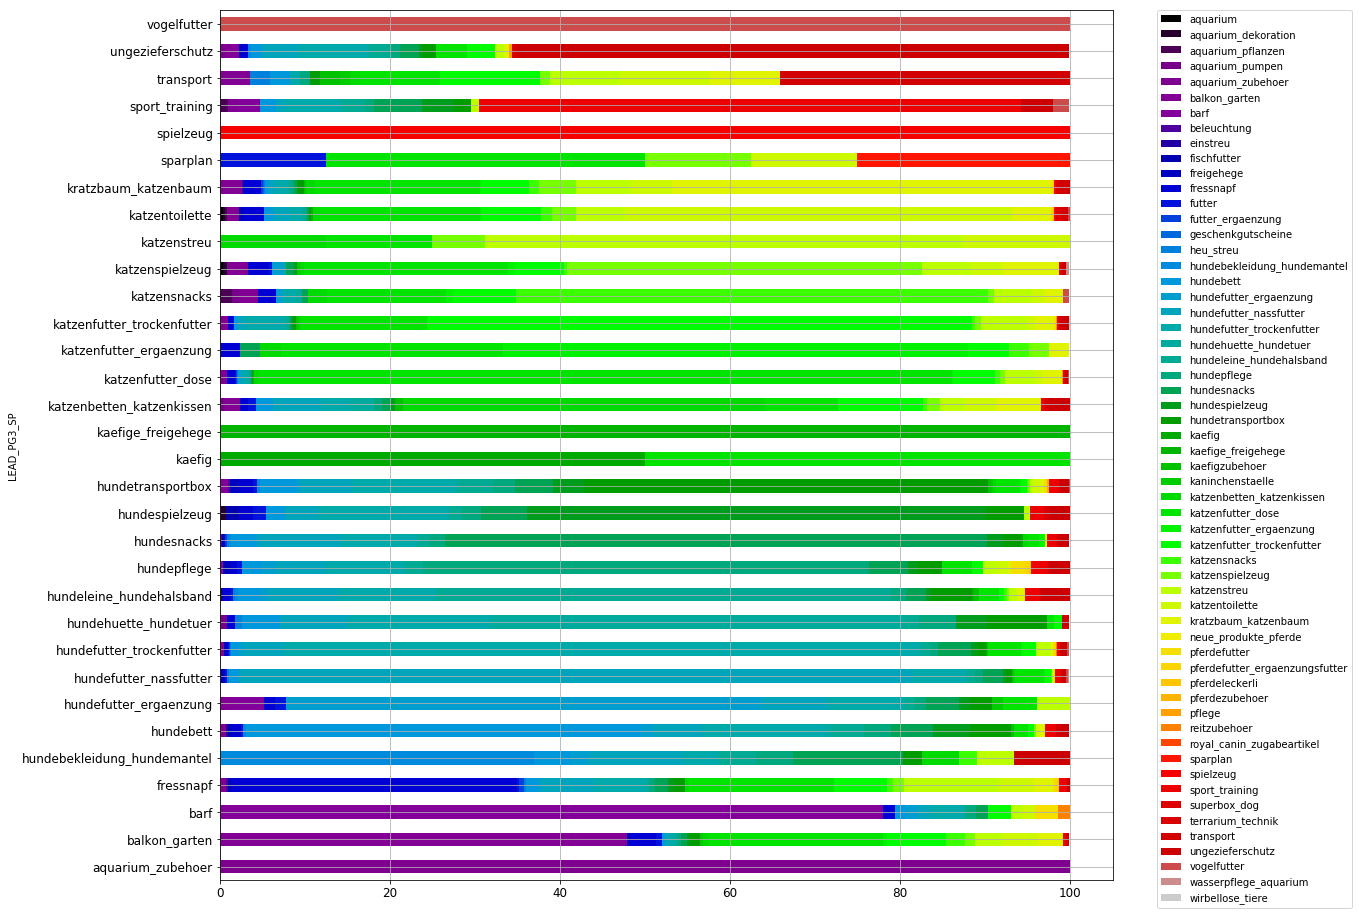

In [182]:
orders_crosstab_perc.plot(kind='barh', stacked=True, figsize=(16, 16), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Absolute cross tab and plot regarding the SP type (as Lead PG3 level) and number of orders from different Lead PG3

In [183]:
orders_crosstab_abs = pd.crosstab(orders_sppg_pg3['LEAD_PG3_SP'], orders_sppg_pg3['LEAD_PG3_NAME'], values=orders_sppg_pg3['SCM_N_ORDER_NR'],
                              aggfunc='count').fillna(0).astype(int).round(2)

In [184]:
orders_crosstab_abs[orders_crosstab_abs.columns[:10]]

LEAD_PG3_NAME,aquarium,aquarium_dekoration,aquarium_pflanzen,aquarium_pumpen,aquarium_zubehoer,balkon_garten,barf,beleuchtung,einstreu,fischfutter
LEAD_PG3_SP,,,,,,,,,,
aquarium_zubehoer,0,0,0,0,1,0,0,0,0,0
balkon_garten,0,0,0,0,0,128,1,0,0,0
barf,0,0,0,0,0,0,57,0,0,0
fressnapf,0,0,0,0,0,3,0,1,0,0
hundebekleidung_hundemantel,0,0,0,0,0,0,0,0,0,0
hundebett,0,0,0,0,0,3,1,0,1,1
hundefutter_ergaenzung,0,0,0,0,0,1,3,0,0,0
hundefutter_nassfutter,0,0,0,1,0,1,0,0,0,3
hundefutter_trockenfutter,0,0,1,0,0,7,5,1,0,3


In [185]:
orders_crosstab_abs[orders_crosstab_abs.columns[10:20]]

LEAD_PG3_NAME,freigehege,fressnapf,futter,futter_ergaenzung,geschenkgutscheine,heu_streu,hundebekleidung_hundemantel,hundebett,hundefutter_ergaenzung,hundefutter_nassfutter
LEAD_PG3_SP,,,,,,,,,,
aquarium_zubehoer,0,0,0,0,0,0,0,0,0,0
balkon_garten,1,8,2,0,0,0,0,1,0,1
barf,0,1,0,0,0,0,0,1,1,1
fressnapf,2,134,1,2,0,1,0,6,1,25
hundebekleidung_hundemantel,0,0,0,0,0,0,17,2,1,5
hundebett,2,6,1,0,0,0,2,257,8,32
hundefutter_ergaenzung,0,1,1,0,0,0,0,0,43,6
hundefutter_nassfutter,1,2,3,1,0,3,0,13,4,1070
hundefutter_trockenfutter,2,9,6,1,0,3,1,29,15,143


In [186]:
orders_crosstab_abs[orders_crosstab_abs.columns[20:30]]

LEAD_PG3_NAME,hundefutter_trockenfutter,hundehuette_hundetuer,hundeleine_hundehalsband,hundepflege,hundesnacks,hundespielzeug,hundetransportbox,kaefig,kaefige_freigehege,kaefigzubehoer
LEAD_PG3_SP,,,,,,,,,,
aquarium_zubehoer,0,0,0,0,0,0,0,0,0,0
balkon_garten,2,0,1,1,2,1,3,0,0,0
barf,3,0,0,1,1,0,0,0,0,0
fressnapf,25,0,1,3,6,3,5,0,0,0
hundebekleidung_hundemantel,2,0,2,2,6,0,1,0,0,0
hundebett,81,4,20,18,27,24,27,0,0,2
hundefutter_ergaenzung,7,0,1,1,3,1,2,0,0,0
hundefutter_nassfutter,87,1,12,14,31,5,9,0,1,2
hundefutter_trockenfutter,2252,5,33,29,117,20,33,0,2,4


In [187]:
orders_crosstab_abs[orders_crosstab_abs.columns[30:40]]

LEAD_PG3_NAME,kaninchenstaelle,katzenbetten_katzenkissen,katzenfutter_dose,katzenfutter_ergaenzung,katzenfutter_trockenfutter,katzensnacks,katzenspielzeug,katzenstreu,katzentoilette,kratzbaum_katzenbaum
LEAD_PG3_SP,,,,,,,,,,
aquarium_zubehoer,0,0,0,0,0,0,0,0,0,0
balkon_garten,1,2,55,1,19,6,3,9,11,8
barf,0,0,0,0,2,0,0,1,1,0
fressnapf,0,2,68,0,25,3,5,45,16,9
hundebekleidung_hundemantel,0,2,0,0,0,1,0,2,0,0
hundebett,0,0,9,0,4,0,1,0,3,3
hundefutter_ergaenzung,1,0,3,0,0,0,0,3,0,0
hundefutter_nassfutter,1,2,46,1,10,1,0,2,1,1
hundefutter_trockenfutter,0,1,118,1,51,1,1,50,1,8


In [188]:
orders_crosstab_abs[orders_crosstab_abs.columns[40:]]

LEAD_PG3_NAME,neue_produkte_pferde,pferdefutter,pferdefutter_ergaenzungsfutter,pferdeleckerli,pferdezubehoer,pflege,reitzubehoer,royal_canin_zugabeartikel,sparplan,spielzeug,sport_training,superbox_dog,terrarium_technik,transport,ungezieferschutz,vogelfutter,wasserpflege_aquarium,wirbellose_tiere
LEAD_PG3_SP,,,,,,,,,,,,,,,,,,
aquarium_zubehoer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
balkon_garten,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
barf,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
fressnapf,0,1,2,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0
hundebekleidung_hundemantel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
hundebett,0,0,0,0,0,0,0,0,0,0,7,0,0,3,6,0,0,0
hundefutter_ergaenzung,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hundefutter_nassfutter,0,1,1,0,0,0,0,0,0,0,9,2,0,0,6,3,2,0
hundefutter_trockenfutter,1,2,7,1,0,1,1,1,0,0,11,0,0,0,25,7,1,0


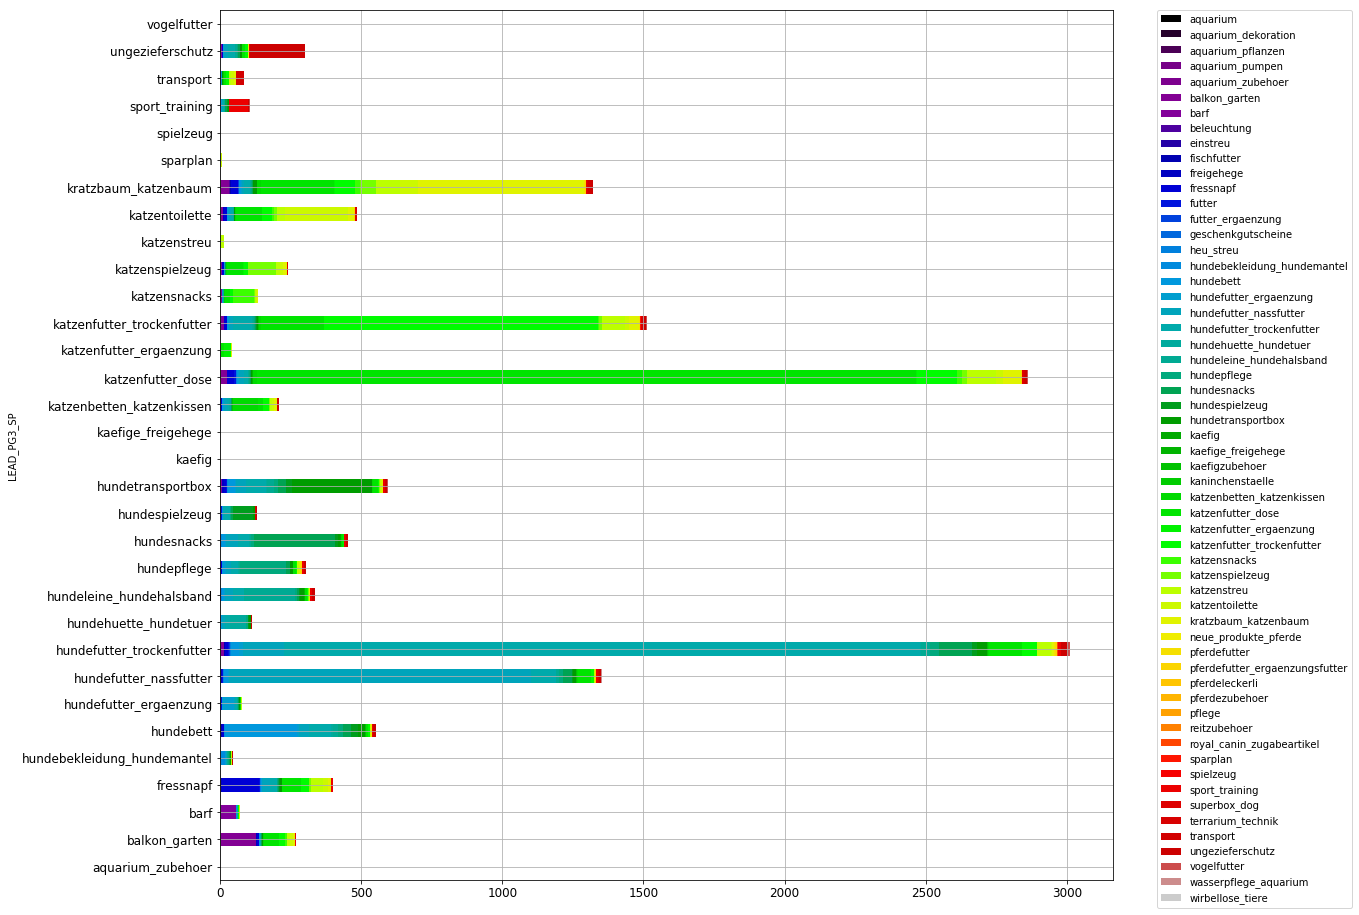

In [189]:
orders_crosstab_abs.plot(kind='barh', stacked=True, figsize=(16, 16), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Relative cross tab and plot regarding the SP type (as Lead PG3 level) and CM2 (% from total CM2 in Lead PG3 SP) from different Lead PG3

In [190]:
cm2_sppg_pg3 = data.groupby(['SCM_N_ORDER_NR', 'LEAD_PG3_SP', 'LEAD_PG3_NAME'], as_index=False)['SCM_D_FINANCE_CM2'].sum()

In [191]:
orders_crosstab_cm2_perc = pd.crosstab(cm2_sppg_pg3['LEAD_PG3_SP'], cm2_sppg_pg3['LEAD_PG3_NAME'], values=cm2_sppg_pg3['SCM_D_FINANCE_CM2'],
                              aggfunc='sum').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

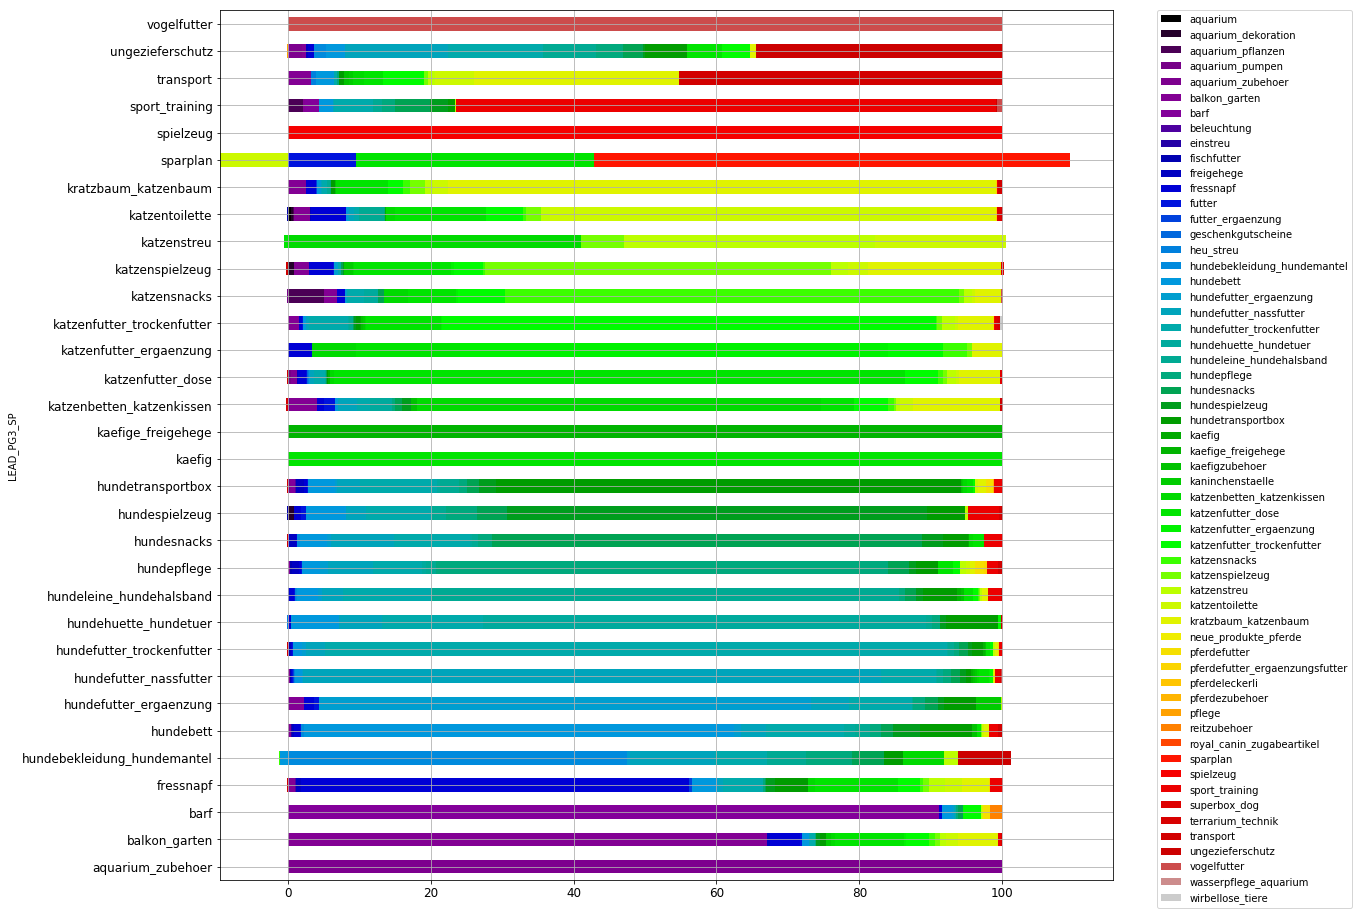

In [192]:
orders_crosstab_cm2_perc.plot(kind='barh', stacked=True, figsize=(16, 16), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [193]:
orders_crosstab_cm2_perc[orders_crosstab_cm2.columns[:10]]

NameError: name 'orders_crosstab_cm2' is not defined

In [ ]:
orders_crosstab_cm2_perc[orders_crosstab_cm2.columns[10:20]]

In [ ]:
orders_crosstab_cm2_perc[orders_crosstab_cm2.columns[20:30]]

In [ ]:
orders_crosstab_cm2_perc[orders_crosstab_cm2.columns[30:40]]

In [ ]:
orders_crosstab_cm2_perc[orders_crosstab_cm2.columns[40:]]